In [1]:
#Importatndo Bibliotecas
import numpy as np
import pandas as pd
import numpy.linalg as la
from random import random
import matplotlib.pyplot as plt

In [11]:
# Definição dos dados utilizados

# StateSpace
Estados = ["NoItem","RankE","RankD","RankC","RankB","RankA","RankS"]
mEstados = np.matrix(Estados)

# Possível Sequência de Eventos
Nome_Transição = [["NN","NE","ND","NC","NB","NA","NS"],["EN","EE","ED","EC","EB","EA","ES"],["DN","DE","DD","DC","DB","DA","DS"],["CN","CE","CD","CC","CB","CA","CS"],["BN","BE","BD","BC","BB","BA","BS"],["AN","AE","AD","AC","AB","AA","AS"],["SN","SE","SD","SC","SB","SA","SS"],]

# Matriz de Probabilidade (Matriz de Transição)
P = [[0.18852997, 0.29969015, 0.16741733, 0.15868755, 0.13225741, 0.03519849, 0.0182191 ],[ 0.20299145, 0.33034111, 0.25403229, 0.10780619, 0.03553349, 0.0371073 , 0.03218817],[ 0.09702642, 0.30264242,0.34119007, 0.11049866, 0.08203434, 0.03821165, 0.02839644], [ 0.05849313,  0.1183, 0.29700364, 0.38322587, 0.10389498, 0.03627963, 0.00280275], [0.17298618, 0.0039236 , 0.08572347, 0.24181045,0.23256579, 0.23382358 , 0.02916692], [0.00784439, 0.01515655, 0.14016649, 0.22954086, 0.2376065 , 0.23933719, 0.13034803], [0.00882801, 0.05699326, 0.10251779, 0.15398702, 0.24236431, 0.2268774, 0.20843222 ]]
MP = np.matrix(P)
# Grupo Base que será analisado
Base_Group = [[0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0]]
mbg = np.matrix(Base_Group)
# Vetor Unitário
vetor_e = np.ones(7)

#Matriz Unitária
matrix_U = np.ones((7,7))
Matrix_U = np.matrix(matrix_U)

# Matriz Identidade
matrix_I = np.identity(7)
Matrix_I = np.matrix(matrix_I)

In [3]:
#Calculo dos Estados possíveis do segundo Drop:
Seconddrop = np.matmul(Base_Group, P)
Seconddrop

array([[0.19576071, 0.31501563, 0.21072481, 0.13324687, 0.08389545,
        0.0361529 , 0.02520364]])

In [4]:
# Matriz de Transição para o segundo drop:
M2 = np.linalg.matrix_power(P,2)
M2

array([[0.14521978, 0.22703165, 0.23008506, 0.1844046 , 0.10934193,
        0.07339379, 0.03052318],
       [0.1430022 , 0.26213055, 0.24814083, 0.15927595, 0.09550726,
        0.05751371, 0.03442948],
       [0.13403531, 0.24790311, 0.25765342, 0.16105118, 0.09809596,
        0.06646126, 0.03479976],
       [0.10455661, 0.19294794, 0.26927771, 0.23559831, 0.10958148,
        0.065313  , 0.02272494],
       [0.09819358, 0.11380689, 0.18672489, 0.24441432, 0.17188715,
        0.13524223, 0.04973092],
       [0.07571278, 0.08892149, 0.18843992, 0.23879829, 0.18064158,
        0.15693549, 0.07055046],
       [0.07773304, 0.08698463, 0.17061378, 0.22066472, 0.18839092,
        0.17018881, 0.08542411]])

In [5]:
#Cálculo dos Estados Possíveis do terceiro Drop:
Thirdydrop = np.matmul(Base_Group, M2)
Thirdydrop

array([[0.14411099, 0.2445811 , 0.23911295, 0.17184027, 0.1024246 ,
        0.06545375, 0.03247633]])

In [6]:
# Distribuição Estacionária
Pi = np.dot(vetor_e,(np.linalg.inv(matrix_I + matrix_U - P)))
print(Pi)

[0.11989791 0.20148097 0.23690266 0.19718164 0.12061642 0.08528307
 0.03863733]


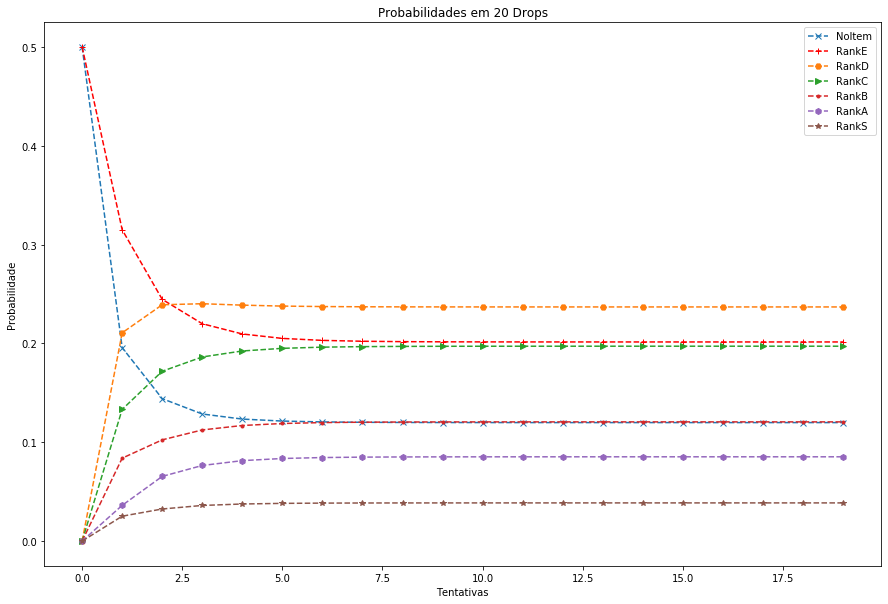

In [24]:
# Gráfico para ilustrar a probabilidade da raridade de cada item conforme as tentativas

# Calculo dos dados para 20 tentativas:
plot_data = []
for step in range(20):
    result = mbg * mP ** step
    plot_data.append(np.array(result).flatten())
    
# Conversão de Formato: 
plot_data = np.array(plot_data)

# Obtenção dos dados por arrays individuais divididos por raridade:
Ncolumn = plot_data[:, [0]]
Narr=np.array(Ncolumn)

Ecolumn = plot_data[:, [1]]
Earr = np.array(Ecolumn)

Dcolumn = plot_data[:, [2]]
Darr = np.array(Dcolumn)

Ccolumn = plot_data[:, [3]]
Carr = np.array(Ccolumn)

Bcolumn = plot_data[:, [4]]
Barr = np.array(Bcolumn)

Acolumn = plot_data[:, [5]]
Aarr = np.array(Acolumn)

Scolumn = plot_data[:, [6]]
Sarr = np.array(Scolumn)

# Definição do número de tentativas e eixo x do gráfico:
Tentativas = np.arange(0,20,1)

#Plot do gráfico
def plot_temp():
    fig, ax = plt.subplots(figsize=(15,10))
    plt.title("Probabilidades em 20 Drops")
    plt.xlabel('Tentativas')
    plt.ylabel('Probabilidade') 
    ax.plot(Tentativas, Narr, "--x", label = "NoItem")
    ax.plot(Tentativas, Earr, "--r+", label = "RankE")
    ax.plot(Tentativas, Darr, "--H", label = "RankD")
    ax.plot(Tentativas, Carr, "-->", label = "RankC")
    ax.plot(Tentativas, Barr, "--.", label = "RankB")
    ax.plot(Tentativas, Aarr, "--h", label = "RankA")
    ax.plot(Tentativas, Sarr, "--*", label = "RankS")
    plt.legend()
    plt.savefig('nextstates.png') 

plot_temp()

In [13]:
# Tempo Médio de Primeira Passagem

#Conversão do formato da Distancia Estacionária:
PiM = np.matrix(Pi)
PiMT = np.transpose(PiM)

# Função Utilizada para o cálculo do Tempo Médio de Primeria Passagem:
def FMTP(F):

    A=np.zeros_like(F) # Matriz nula
    k=PiMT.shape[0]
    for i in range(k):
        A[:,i]=PiMT
    A=A.transpose() # matriz transposta
    Z=la.inv(Matrix_I-F+A) # matriz resultante da operaçao
    D=np.diag(1./np.diag(A))
    Zdg=np.diag(np.diag(Z))
    M=(Matrix_I-Z+Matrix_U*Zdg)*D
    return M

# Tempo Médio de Primeira Passagem:
Mu = FMTP(MP)
Mu

matrix([[ 8.340429  ,  5.40428702,  5.09403098,  6.53215517, 10.03707095,
         15.91724321, 33.04100597],
        [ 8.16736596,  4.96324799,  4.62609436,  7.00640827, 11.03956695,
         16.18870503, 32.59800737],
        [ 9.16472089,  5.20974387,  4.22114298,  6.96701686, 10.60101903,
         16.01965134, 32.6438133 ],
        [ 9.83896977,  6.49499776,  4.31392426,  5.07146606, 10.3045441 ,
         16.06879328, 33.77125212],
        [ 9.1949774 ,  7.93625276,  5.75017477,  5.5123654 ,  8.29074514,
         12.26566367, 31.87875263],
        [10.87249929,  8.14473129,  5.55914993,  5.55961876,  8.04698198,
         11.72565672, 28.46899977],
        [10.88392457,  8.02618027,  5.84636893,  6.02422142,  7.85406602,
         11.56263392, 25.88170333]])

In [17]:
# Função para implementar a Cadeia de Markov a partir de uma probabilidade
def drop_forecast(number):
    # Estado Inicial
    Drop = "NoItem"
    print("Drop Inicial: " + Drop)
    # Armazenamento dos dados obtidos
    DropList = [Drop]
    i = 0
    # Calculo da probabilidade para DropList
    prob = 1
    while i != number:
        if Drop == "NoItem":
            change = np.random.choice(Nome_Transição[0],replace=True,p=P[0])
            if change == "NN":
                prob = prob * P[0][0]
                DropList.append("NoItem")
                pass
            elif change == "NE":
                prob = prob * P[0][1]
                Drop = "RankE"
                DropList.append("RankE")
            elif change == "ND":
                prob = prob * P[0][2]
                Drop = "RankD"
                DropList.append("RankD")
            elif change == "NC":
                prob = prob * P[0][3]
                Drop = "RankC"
                DropList.append("RankC")
            elif change == "NB":
                prob = prob * P[0][4]
                Drop = "RankB"
                DropList.append("RankB")
            elif change == "NA":
                prob = prob * P[0][5]
                Drop = "RankA"
                DropList.append("RankA")
            else:
                prob = prob * P[0][6]
                Drop = "RankS"
                DropList.append("RankS")
                
        elif Drop == "RankE":
            change = np.random.choice(Nome_Transição[1],replace=True,p=P[1])
            if change == "EE":
                prob = prob * P[1][1]
                DropList.append("RankE")
                pass
            elif change == "EN":
                prob = prob * P[1][0]
                Drop = "NoItem"
                DropList.append("NoItem")
            elif change == "ED":
                prob = prob * P[1][2]
                Drop = "RankD"
                DropList.append("RankD")
            elif change == "EC":
                prob = prob * P[1][3]
                Drop = "RankC"
                DropList.append("RankC")
            elif change == "EB":
                prob = prob * P[1][4]
                Drop = "RankB"
                DropList.append("RankB")
            elif change == "EA":
                prob = prob * P[1][5]
                Drop = "RankA"
                DropList.append("RankA")
            else:
                prob = prob * P[1][6]
                Drop = "RankS"
                DropList.append("RankS")
                
        elif Drop == "RankD":
            change = np.random.choice(Nome_Transição[2],replace=True,p=P[2])
            if change == "DD":
                prob = prob * P[2][2]
                DropList.append("RankD")
                pass
            elif change == "DN":
                prob = prob * P[2][0]
                Drop = "NoItem"
                DropList.append("NoItem")
            elif change == "DE":
                prob = prob * P[2][1]
                Drop = "RankE"
                DropList.append("RankE")
            elif change == "DC":
                prob = prob * P[2][3]
                Drop = "RankC"
                DropList.append("RankC")
            elif change == "DB":
                prob = prob * P[2][4]
                Drop = "RankB"
                DropList.append("RankB")
            elif change == "DA":
                prob = prob * P[2][5]
                Drop = "RankA"
                DropList.append("RankA")
            else:
                prob = prob * P[2][6]
                Drop = "RankS"
                DropList.append("RankS")
                
        elif Drop == "RankC":
            change = np.random.choice(Nome_Transição[3],replace=True,p=P[3])
            if change == "CC":
                prob = prob * P[3][3]
                DropList.append("RankC")
                pass
            elif change == "CN":
                prob = prob * P[3][0]
                Drop = "NoItem"
                DropList.append("NoItem")
            elif change == "CE":
                prob = prob * P[3][1]
                Drop = "RankE"
                DropList.append("RankE")
            elif change == "CD":
                prob = prob * P[3][2]
                Drop = "RankD"
                DropList.append("RankD")
            elif change == "CB":
                prob = prob * P[3][4]
                Drop = "RankB"
                DropList.append("RankB")
            elif change == "CA":
                prob = prob * P[3][5]
                Drop = "RankA"
                DropList.append("RankA")
            else:
                prob = prob * P[3][6]
                Drop = "RankS"
                DropList.append("RankS")
                
        elif Drop == "RankB":
            change = np.random.choice(Nome_Transição[4],replace=True,p=P[4])
            if change == "BB":
                prob = prob * P[4][4]
                DropList.append("RankB")
                pass
            elif change == "BN":
                prob = prob * P[4][0]
                Drop = "NoItem"
                DropList.append("NoItem")
            elif change == "BE":
                prob = prob * P[4][1]
                Drop = "RankE"
                DropList.append("RankE")
            elif change == "BD":
                prob = prob * P[4][2]
                Drop = "RankD"
                DropList.append("RankD")
            elif change == "BC":
                prob = prob * P[4][3]
                Drop = "RankC"
                DropList.append("RankC")
            elif change == "BA":
                prob = prob * P[4][5]
                Drop = "RankA"
                DropList.append("RankA")
            else:
                prob = prob * P[4][6]
                Drop = "RankS"
                DropList.append("RankS")
                
        elif Drop == "RankA":
            change = np.random.choice(Nome_Transição[5],replace=True,p=P[5])
            if change == "AA":
                prob = prob * P[5][5]
                DropList.append("RankA")
                pass
            elif change == "AN":
                prob = prob * P[5][0]
                Drop = "NoItem"
                DropList.append("NoItem")
            elif change == "AE":
                prob = prob * P[5][1]
                Drop = "RankE"
                DropList.append("RankE")
            elif change == "AD":
                prob = prob * P[5][2]
                Drop = "RankD"
                DropList.append("RankD")
            elif change == "AC":
                prob = prob * P[5][3]
                Drop = "RankC"
                DropList.append("RankC")
            elif change == "AB":
                prob = prob * P[5][4]
                Drop = "RankB"
                DropList.append("RankB")
            else:
                prob = prob * P[5][6]
                Drop = "RankS"
                DropList.append("RankS")

        elif Drop == "RankS":
            change = np.random.choice(Nome_Transição[1],replace=True,p=P[1])
            if change == "SS":
                prob = prob * P[6][6]
                DropList.append("RankS")
                pass
            elif change == "SN":
                prob = prob * P[6][0]
                Drop = "NoItem"
                DropList.append("NoItem")
            elif change == "SE":
                prob = prob * P[6][1]
                Drop = "RankE"
                DropList.append("RankE")
            elif change == "SD":
                prob = prob * P[6][2]
                Drop = "RankD"
                DropList.append("RankD")
            elif change == "SC":
                prob = prob * P[6][3]
                Drop = "RankC"
                DropList.append("RankC")
            elif change == "SB":
                prob = prob * P[6][4]
                Drop = "RankB"
                DropList.append("RankB")
            else:
                prob = prob * P[6][5]
                Drop = "RankA"
                DropList.append("RankA")
                
        i += 1  
    print("Possíveis Drops: " + str(DropList))
    print("Ultimo Drop depois de "+ str(number) + " monstros: " + Drop)
    print("Probabilidade de a possível sequência de Drops: " + str(prob))

# Função que define a raridade dos próximos n drops:
drop_forecast(20)

Drop Inicial: NoItem
Possíveis Drops: ['NoItem', 'RankE', 'RankE', 'RankA', 'RankS', 'RankA', 'RankS', 'RankA', 'RankC', 'RankC', 'RankC', 'NoItem', 'NoItem', 'RankC', 'RankD', 'RankD', 'RankD', 'NoItem', 'RankC', 'RankC', 'RankC']
Ultimo Drop depois de 20 monstros: RankC
Probabilidade de a possível sequência de Drops: 1.4817695300619573e-14
